## Projet de Maching Leraning

## Introduction


This document contains practical exercises designed to reinforce your understanding
of unsupervised learning techniques. Each exercise builds upon the
theoretical concepts covered in the lectures.

**2.1 Objective**

Implement a customer segmentation system using K-means clustering and evaluate
the results using various metrics.

2.2 **Dataset**

In [127]:
import numpy as np
import pandas as pd
import matplotlib as plt

# Generate synthetic customer data
np. random . seed (42)
n_customers = 1000
customer_data = pd. DataFrame({'spending': np. random . normal (500 , 100 , n_customers ),
 'frequency': np. random . normal (10 , 3, n_customers ),
'recency': np. random . normal (30 , 10, n_customers ), 'loyalty_score': np. random . normal (50 , 15, n_customers )})


In [128]:
customer_data


,spending,frequency,recency,loyalty_score
0,549.671415,14.198066,23.248217,21.382887
1,486.173570,12.773901,28.554813,37.094225
2,564.768854,10.178891,22.075801,43.795917
3,652.302986,8.059190,26.920385,78.315315
4,476.584663,12.094670,11.063853,58.348297
...,...,...,...,...
995,471.889971,13.210451,30.774805,50.426864
996,679.768653,9.920436,32.577525,18.832823
997,564.084286,7.354376,17.582394,45.195533
998,442.882101,9.510799,33.341764,74.650672


**2.3 Tasks**

**1-1. Data Preprocessing**

**Scale the features using StandardScaler**

In [129]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_customer_data= scaler.fit_transform(customer_data)
scaled_customer_data = pd.DataFrame(scaled_customer_data, columns=customer_data.columns)
scaled_customer_data


,spending,frequency,recency,loyalty_score
0,0.487759,1.332576,-0.692816,-1.840107
1,-0.161022,0.856405,-0.152959,-0.819843
2,0.642015,-0.011240,-0.812090,-0.384647
3,1.536382,-0.719965,-0.319235,1.856976
4,-0.258995,0.629303,-1.932372,0.560356
...,...,...,...,...
995,-0.306963,1.002366,0.072888,0.045954
996,1.817009,-0.097655,0.256285,-2.005703
997,0.635020,-0.955620,-1.269219,-0.293759
998,-0.603347,-0.234617,0.334033,1.619001


**Handle any outliers using IQR method**

In [130]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound)).sum()
    return outliers

# Apply the function to each column
outliers_per_variable =detect_outliers_iqr(scaled_customer_data)

outliers_per_variable


spending          8
frequency         8
recency          10
loyalty_score     5
dtype: int64

In [131]:
import numpy as np
def handle_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers with the bounds
    data = np.where(data < lower_bound, lower_bound, data)
    data = np.where(data > upper_bound, upper_bound, data)
    return data

# Apply the function to each column of the DataFrame
for column in scaled_customer_data.columns:
    scaled_customer_data[column] = handle_outliers_iqr(scaled_customer_data[column])

scaled_customer_data


,spending,frequency,recency,loyalty_score
0,0.487759,1.332576,-0.692816,-1.840107
1,-0.161022,0.856405,-0.152959,-0.819843
2,0.642015,-0.011240,-0.812090,-0.384647
3,1.536382,-0.719965,-0.319235,1.856976
4,-0.258995,0.629303,-1.932372,0.560356
...,...,...,...,...
995,-0.306963,1.002366,0.072888,0.045954
996,1.817009,-0.097655,0.256285,-2.005703
997,0.635020,-0.955620,-1.269219,-0.293759
998,-0.603347,-0.234617,0.334033,1.619001


**Visualize the distribution of each feature**

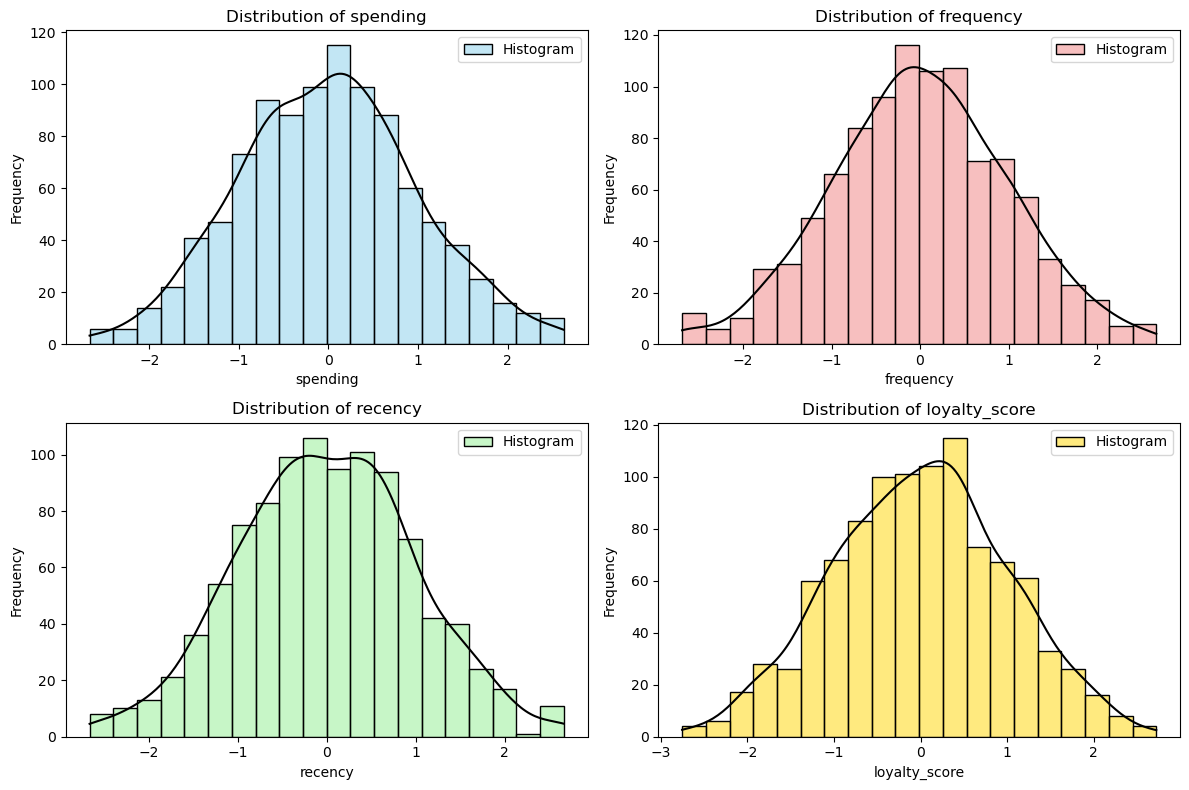

In [132]:

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of each feature
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for i, column in enumerate(scaled_customer_data.columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.histplot(scaled_customer_data[column], kde=True, ax=ax, color=colors[i], label='Histogram')
    ax.lines[0].set_color('black') # set density plot color to black
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()


Analysis of the histogram graphs with the density curves of the different variables in our database shows that these are normally distributed, as their densities are very close to those of a normal distribution.

**2. Clustering Implementation**

**Implement K-means clustering**

In order to know the different classes of our observations from their characteristics, we will carry out two classification algorithms in this section, namely K-Means and PCA. To implement K-Means, we need to determine the number K, which represents the number of classes in our observations. We will first assume that this number is equal to 3 and run the K-Means algorithm to see visually whether this number is efficiently chosen.

C:\Users\USER\ANA3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


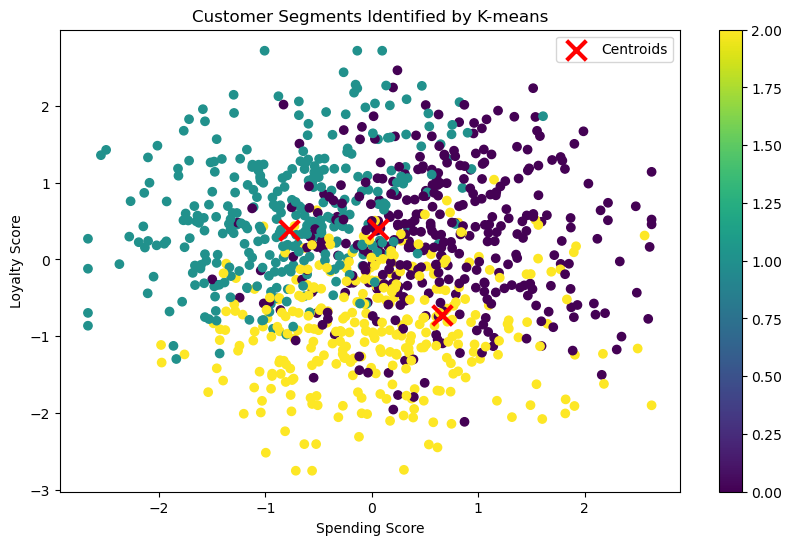

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Suppose that number of clusters=3
# Apply K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_customer_data)

# Visualize results (using spending and loyalty_score for 2D visualization)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(scaled_customer_data['spending'], scaled_customer_data['loyalty_score'], c=clusters, cmap='viridis')
centers = kmeans.cluster_centers_

# Plot centroids
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.title('Customer Segments Identified by K-means')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Score')
plt.legend()
plt.colorbar(scatter)
plt.show()


The scatter plot analysis shows that there is a better separation between the three specific classes in advance. Nevertheless, we also have some overlap of some observations from one class into others. This may mean that our number of pre-specified Ks may not be optimal. As a result, we're going to implement the elbow method to determine the K that best separates our obseravations.

### Use elbow method to find optimal number of cluster.

C:\Users\USER\ANA3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\ANA3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\ANA3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\ANA3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to 

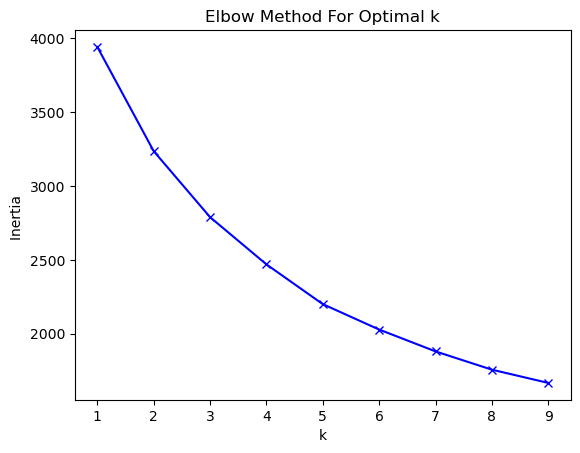

In [135]:
# Elbow Method Implementation
inertias = []
K = range (1 , 10)
for k in K :
    kmeans = KMeans ( n_clusters =k , random_state =42)
    kmeans . fit ( scaled_customer_data)
    inertias . append ( kmeans . inertia_ )

plt.plot(K, inertias, 'bx-') # Remove the space and combine linestyle symbols
plt . xlabel ( 'k')
plt . ylabel ( 'Inertia ')
plt . title ( 'Elbow Method For Optimal k')
plt . show ()


The elbow graph above shows the inertia obtained for each number of K specified in 1-10, but does not specifically show the optimum K on which there is a sharp drop in inertia. We have ambiguity between K=3, K=4 and K=5. So, in order to get a better precision, we're going to calculate some metrics in order to know precisely the K that gives us the best separation of our observations. We will typically use the following metrics: Silhouette coefficient and Davies-Bouldin index.

## Calcule des metrics pour la selection d'un K optimale.

In [136]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Create a dictionary to store the results
results = {}

# Iterate through different values of K
for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_customer_data)

  # Calculate metrics
    silhouette_avg = silhouette_score(scaled_customer_data, clusters)
    davies_bouldin_avg = davies_bouldin_score(scaled_customer_data, clusters)

  # Store the results in the dictionary
    results[k] = {'silhouette_score': silhouette_avg, 'davies_bouldin_score': davies_bouldin_avg}

# Create a Pandas DataFrame for better visualization
import pandas as pd
df_results = pd.DataFrame(results).T

# Print the results
df_results


C:\Users\USER\ANA3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\ANA3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\ANA3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,silhouette_score,davies_bouldin_score
3,0.167346,1.690113
4,0.167722,1.540919
5,0.179138,1.393771


### Interpretation

**Silhouette score**: This metric varies between -1 and 1. A value close to 1 indicates that the points are well placed in their clusters. Here, we observe that the score increases slightly as K increases, with K=5 presenting the best score (0.179138). However, all scores are relatively low, suggesting that the clusters are not very well separated.

**Davies-Bouldin score**: This metric measures the average separation between clusters. The lower the value, the better the separation. We see a downward trend as K increases, with K=5 offering the best score (1.393771).

**Conclusion**: 

Based on these metrics, K=5 appears to be the best choice among the options presented, as it offers both the best silhouette score (higher) and the best Davies-Bouldin score (lower). This suggests that dividing the data into 5 clusters would probably produce a better clustering structure than 3 or 4 clusters.

## Representation avec K=5

C:\Users\USER\ANA3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


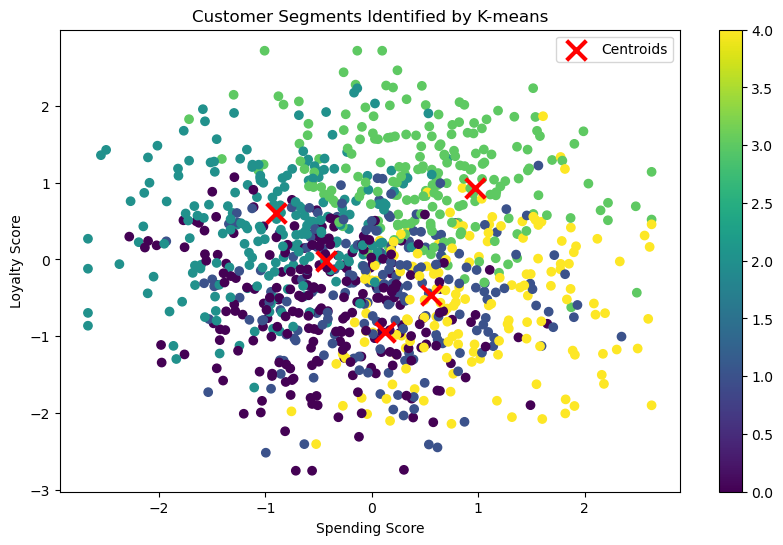

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Suppose that number of clusters=3
# Apply K-means
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_customer_data)

# Visualize results (using spending and loyalty_score for 2D visualization)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(scaled_customer_data['spending'], scaled_customer_data['loyalty_score'], c=clusters, cmap='viridis')
centers = kmeans.cluster_centers_

# Plot centroids
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.title('Customer Segments Identified by K-means')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Score')
plt.legend()
plt.colorbar(scatter)
plt.show()

## Visualize clusters using PCA for dimensionality reduction.

In this section we will determine the number of optimal clusters using the PCA method. For PCA, determining the optimal number of clusters is linked to determining the optimal number of dimensions in which to observe the observations accurately. So we need to find the number of axes that capture the maximum information contained in our database. To do this, let's calculate the explained variance of each principal component.

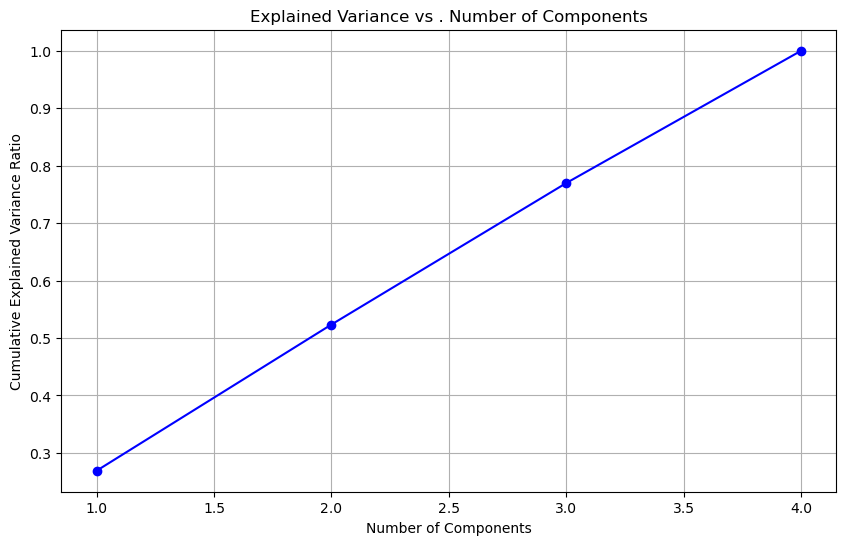

In [137]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA ()
X_pca = pca . fit_transform ( scaled_customer_data )

# Calculate explained variance ratio
explained_variance_ratio = pca . explained_variance_ratio_

# Plot explained variance ratio
plt . figure ( figsize =(10 , 6) )
plt . plot ( range (1 , len ( explained_variance_ratio ) + 1) ,
np . cumsum ( explained_variance_ratio ) , 'bo-')
plt . xlabel ('Number of Components')
plt . ylabel ('Cumulative Explained Variance Ratio')
plt . title ('Explained Variance vs . Number of Components')
plt . grid ( True )
plt . show ()

The graph of the varainces explained by each of the above axes shows that the first two axes contain 40% more than 50% of the information contained in the large database. So, to stay within the plan, we'll use the first two principal components to visualize our observations and identify the optimal number of classes.

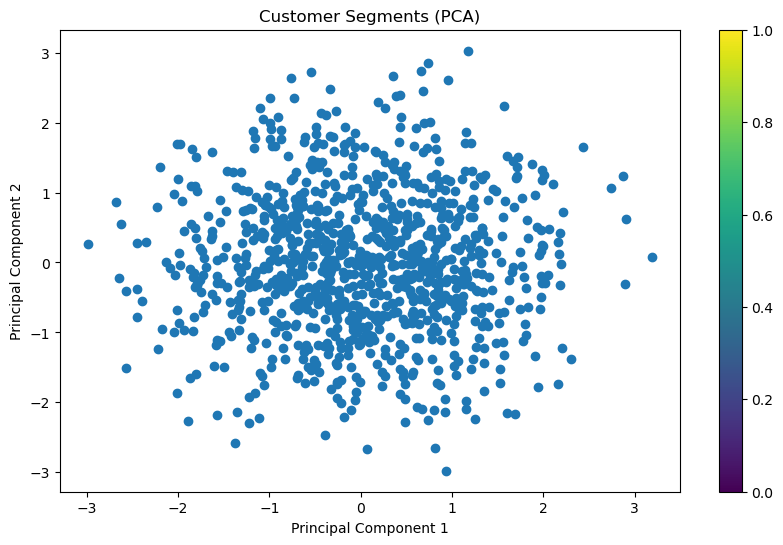

In [139]:
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca  = pca.fit_transform(scaled_customer_data)

# Visualize the clusters in the reduced dimensional space
plt.figure(figsize=(10, 6))
plt.scatter(X_pca [:, 0],X_pca  [:, 1])
plt.title('Customer Segments (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


The analysis of the cloud of observations from PCA in dimension 2 doesn't give us any more precision on the classes. We observe a concentration of obervations in the center, but no separation between them and the other observations. On the other hand, K-Means gives us more precision on the number of classes.  For this reason, we continue with K-means for the remainder of the work.

## 3. Analysis

### Calculate cluster centroids.

In [140]:
# Calcul des centroïdes
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=scaled_customer_data.columns) # Use .columns to get column names
centroids['cluster'] = range(kmeans.n_clusters)  # Use kmeans.n_clusters to get the actual number of clusters
print(centroids)




     spending  frequency    recency  loyalty_score  cluster
0  459.642706  10.157513  20.329014      40.209212        0
1  514.180031   7.401497  38.176846      43.232832        1
2  413.636656  12.030571  34.985110      56.230234        2
3  555.880783   8.835350  27.304440      66.448028        3
4  596.437690  13.007574  31.410403      41.280428        4


**Characterize each customer segment**

**Cluster 0:**

**Spending : 459.64**(Average spending)

**Frequency: 10.16** (Average purchase frequency)

**Recency: 20.33** (rather good - recent purchase)

**Loyalty_score : 40.21** (Average loyalty score)

Characterization : These are regular customers with average value. They buy fairly frequently, have made a relatively recent purchase and spend an average amount. They are probably loyal customers, but not the most important.

**Cluster 1:**

**Spending :514.18** (High spending)

**Frequency: 7.40** (Low purchase frequency)

**Recency: 36.18** (Average to poor recency - less recent purchase)

**Loyalty_score : 43.23** (Average to good loyalty score)

**Characterization:** These customers spend a lot per transaction but buy less frequently. They have not made a purchase very recently. These are probably high-value but irregular customers, who make large but infrequent purchases.

**Cluster 2:**

**Spending : 413.64** (Medium to low spending)

**Frequency: 12.03** (High purchase frequency)

**Recency: 34.99** (Average to poor recency)

**Loyalty_score : 56.23** (High loyalty score)

**Characterization:** These are very loyal customers who buy frequently but spend less per transaction. Despite their average recency, they have an excellent loyalty score. They are probably regular customers who value long-term relationships.
**Cluster 3:**

**Spending : 555.86** (Very high spending)

**Frequency: 8.84** (Average purchase frequency)

**Recency: 27.30** (Average recency)

**Loyalty_score : 66.64** (Very high loyalty score)

**Characterization:** These are the premium customers with the highest loyalty score. They spend a lot per transaction and have an average purchase frequency. They are probably the most valuable customers, bringing great value to the company in terms of both spending and loyalty.

**Cluster 4

**Spending: 596.44** (Highest spending)

**Frequency: 13.01**(Highest purchase frequency)

**Recency: 31.41** (Average recency)

**Loyalty_score : 41.28** (Average loyalty score)

**Characterization:** These customers are the most active in terms of spending and purchase frequency. They spend the most and buy the most often, but their loyalty score is only average. They are probably high-value customers who buy a lot, but may be opportunistic or less emotionally attached to the brand.
These characterizations can help you develop marketing strategies tailored to each customer segment.

### Provide business recommendations.

**Cluster 0:**

For customers in this class we provide the following recommendations:
 
-Create a system that encourages these customers to gradually increase their spending per transaction.

-Maintain frequent contact with newsletters and personalized offers

-Suggest complementary products to their usual purchases to increase the average basket

-Offer small benefits to reward consistency (free delivery, samples)

**Cluster 1:**

For customers in this class we provide the following recommendations:

-Develop specific campaigns to reduce the time between purchases

-Offer attractive discounts for large purchases when they return.

-Create notifications to inform them of new products that may be of interest to them

Offer dedicated customer service for these high-value buyers

**Cluster 2:**

For customers in this class we provide the following recommendations:

-Create a loyalty club with exclusive benefits

-Encourage them to try premium products

-Invite them to participate in rewarding referral programs

-Organize previews or special events for this segment

**Cluster 3:**

For customers in this class we provide the following recommendations:

-Offer a personal advisor or concierge service

-Give them access to limited editions or product previews

-Create a higher level of loyalty with substantial benefits

-Offer invitations to exclusive events and unique experiences

**Cluster 4:**

-Develop initiatives that strengthen brand loyalty

-Offer exceptional guarantees or after-sales services to reinforce trust

-Conduct surveys to understand their expectations and improve their experience


## Exercise 2: Dimensionality Reduction Chal-lenge.

### Objective.

The objective is to compare two dimension reduction techniques:

-PCA (Principal Component Analysis): a linear method that reduces dimension while maximizing explained variance.

-t-SNE (t-Distributed Stochastic Neighbor Embedding): a non-linear method that better preserves the local structure of the data.

We'll use the MNIST dataset (images of handwritten digits) to see how these methods work.

**3.2 Dataset**

Use the MNIST digits dataset:

In [43]:
from sklearn . datasets import load_digits
digits = load_digits ()
X , y = digits . data , digits . target

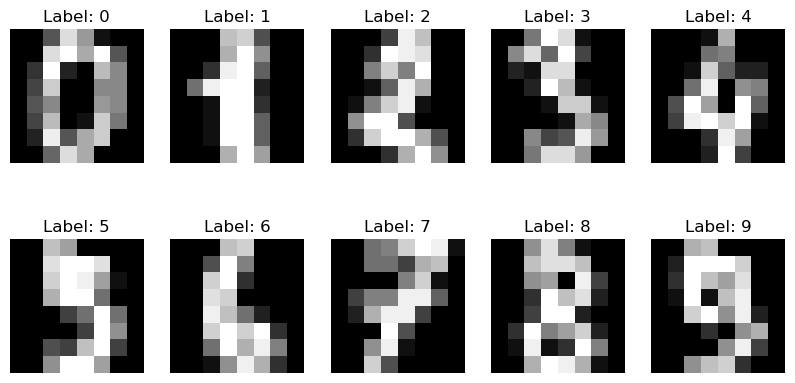

In [44]:
# Affichage de quelques images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')
plt.show()

**3.3 Tasks**

**1. PCA Implementation**

**Reduce dimensions to 2D using PCA**

In [141]:
from sklearn.decomposition import PCA
import numpy as np

## Data Scaling
scaler = StandardScaler()
scaled_X= scaler.fit_transform(X)

# PCA avec 2 composantes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_X)

### Calculate and plot explained variance ratio.

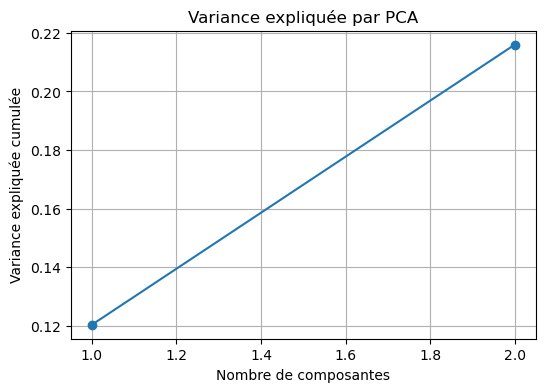

In [142]:
# Affichage du pourcentage de variance expliquée
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée par PCA')
plt.grid()
plt.show()

**Visualize the transformed data**

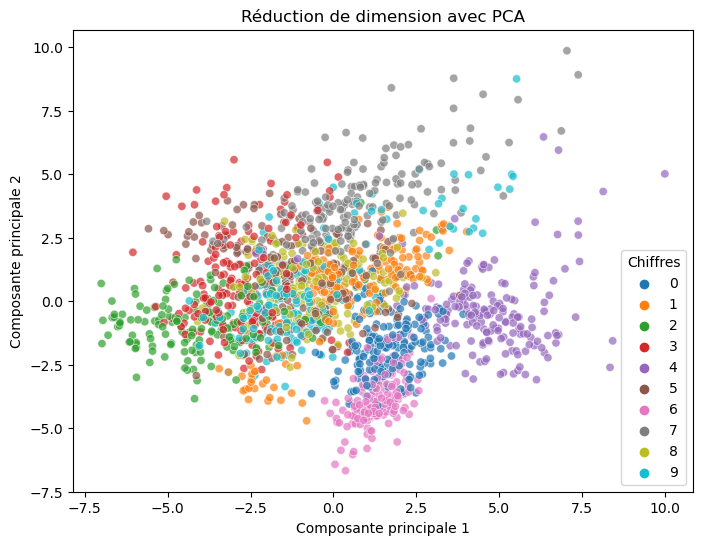

In [143]:
# Visualisation des données projetées en 2D
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='tab10', alpha=0.7)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Réduction de dimension avec PCA')
plt.legend(title="Chiffres")
plt.show()

**2. t-SNE Implementation**

Apply t-SNE with different perplexity values

In [144]:
from sklearn.manifold import TSNE

# Application de t-SNE avec une perplexité de 30
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

**Create an animation of the optimization process**

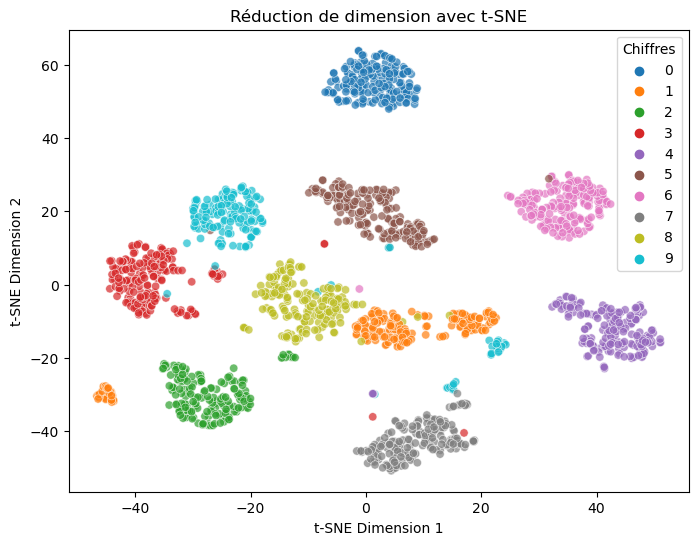

In [145]:
# Visualisation des données après t-SNE
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette='tab10', alpha=0.7)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Réduction de dimension avec t-SNE')
plt.legend(title="Chiffres")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14484\2146082116.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt . tight_layout ()


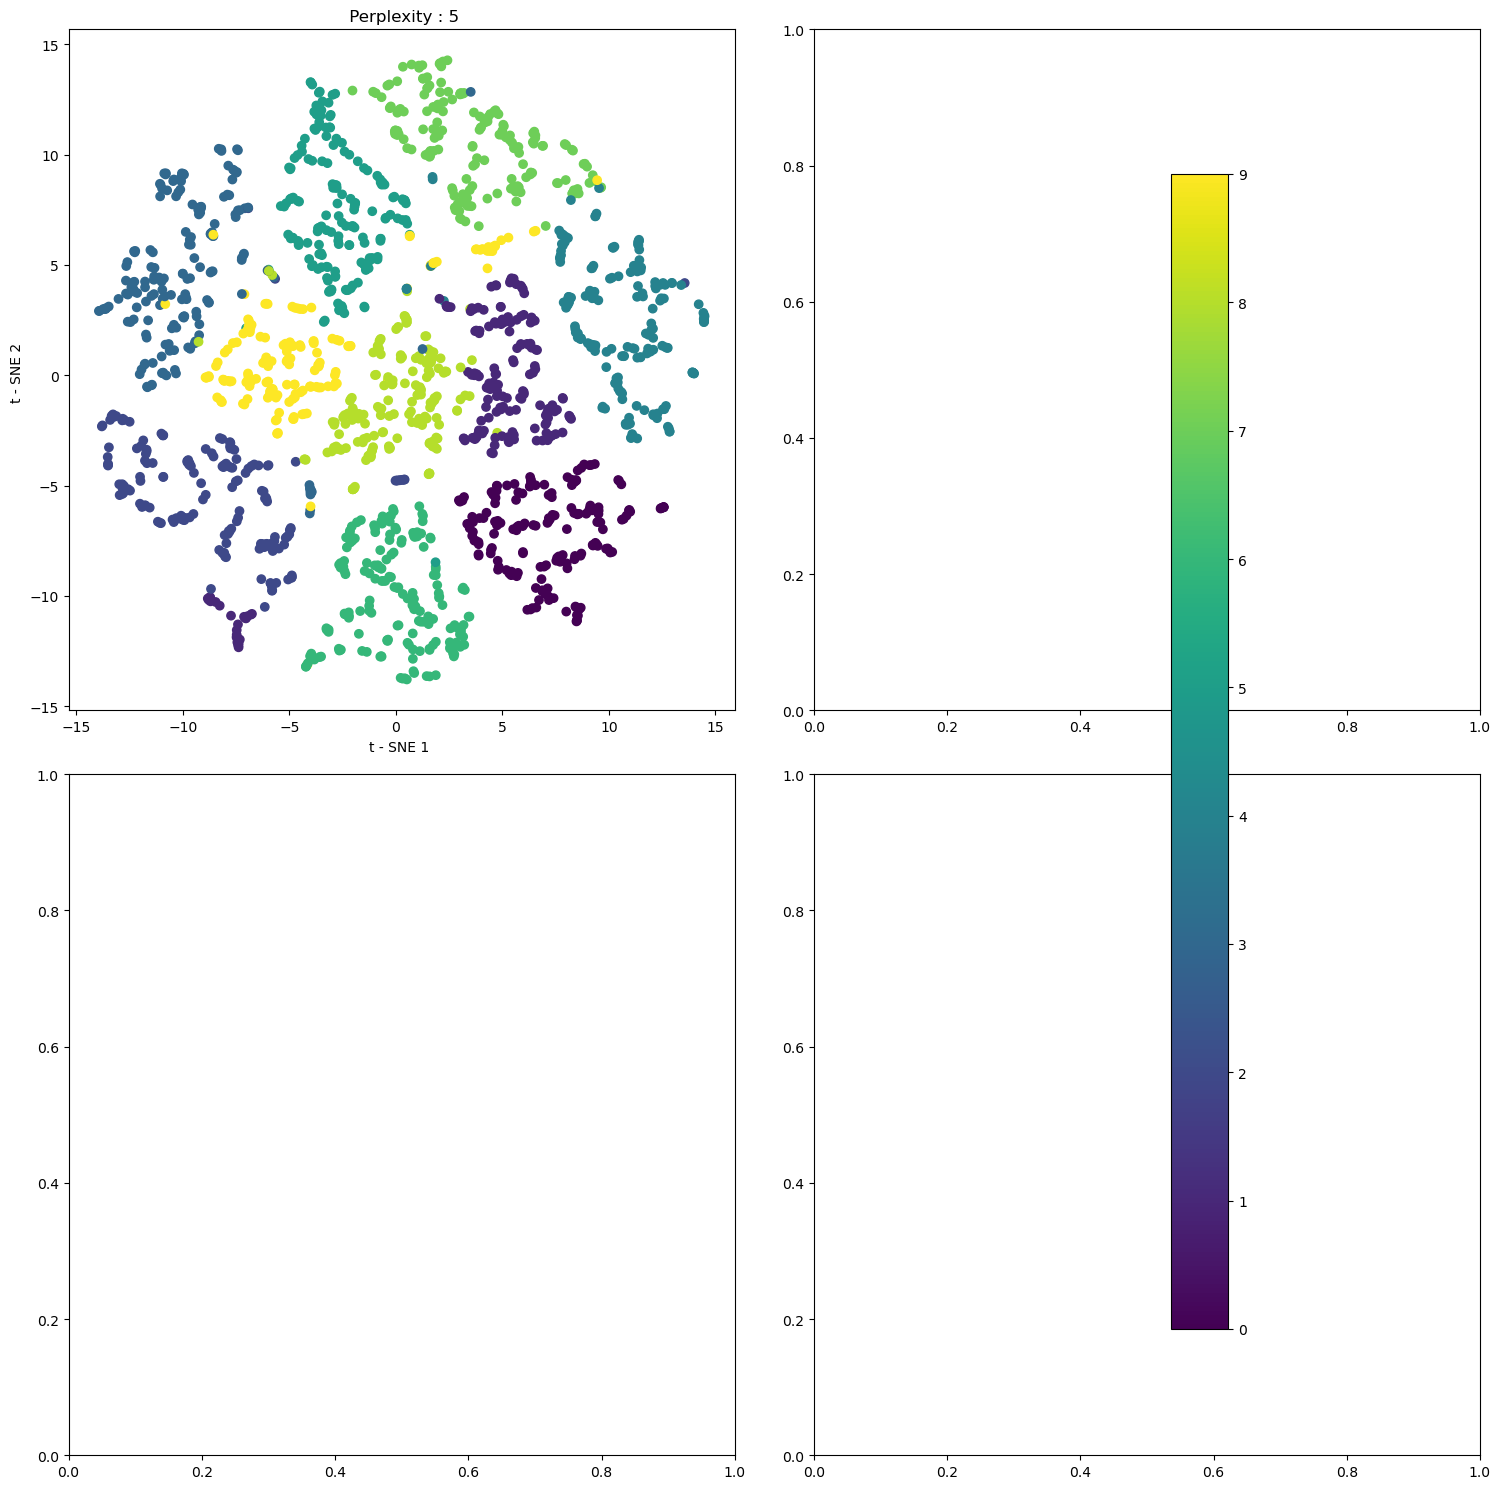

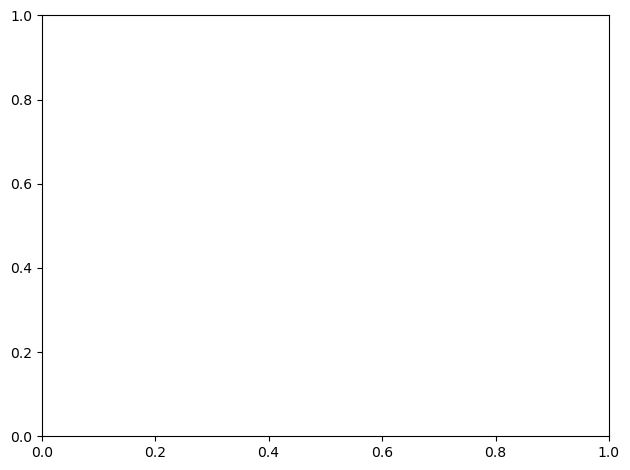

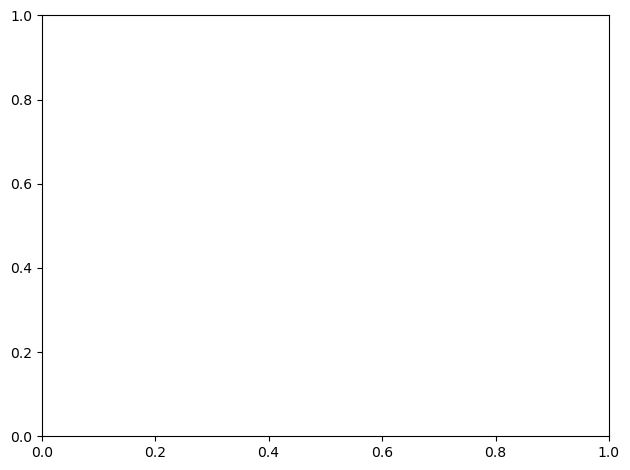

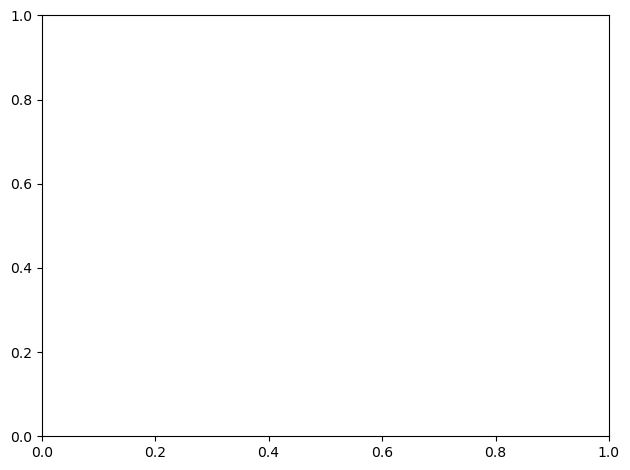

In [146]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . manifold import TSNE
from sklearn . datasets import load_digits
from sklearn . preprocessing import StandardScaler
import seaborn as sns

# Create function to visualize t - SNE with different perplexities
def plot_tsne_perplexity (X , y , perplexities ) :
    fig , axes = plt . subplots (2 , 2 , figsize =(15 , 15) )
    axes = axes . ravel ()
    for idx , perplexity in enumerate ( perplexities ) :
        tsne = TSNE (n_components =2 ,perplexity = perplexity ,random_state =42 , n_iter =300)
        X_tsne = tsne . fit_transform ( X )
        scatter = axes [ idx ]. scatter (X_tsne [: , 0] , X_tsne [: , 1] ,c =y , cmap = 'viridis')
        axes [ idx ]. set_title ( f' Perplexity : { perplexity }')
        axes [ idx ]. set_xlabel ( 't - SNE 1 ')
        axes [ idx ]. set_ylabel ( 't - SNE 2 ')
        plt . colorbar ( scatter , ax = axes )
        plt . tight_layout ()
        plt . show ()

# Try different perplexity values
perplexities = [5 , 30 , 50 , 100]
plot_tsne_perplexity ( scaled_X , y , perplexities )


## Create an animation of the optimization process

In [60]:
# Animated t - SNE 
## Installation of celluloid
!pip install celluloid

def animate_tsne(X, y, n_iter=1000, interval=50):
    tsne = TSNE(n_components=2, random_state=42, n_iter=n_iter)
    fig, ax = plt.subplots()
    camera = Camera(fig)

    for i in range(0, n_iter + 1, interval):
        tsne.n_iter = i
        try:
            X_tsne = tsne.fit_transform(X)
        except ValueError as e:
            print(f"Error during t-SNE fit_transform: {e}")
            continue  # Skip this iteration if there's an error
        ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
        ax.set_title(f't-SNE Iteration: {i}')
        camera.snap()

    animation = camera.animate()
    return animation


## Animation

Error during t-SNE fit_transform: The 'n_iter' parameter of TSNE must be an int in the range [250, inf). Got 0 instead.
Error during t-SNE fit_transform: The 'n_iter' parameter of TSNE must be an int in the range [250, inf). Got 50 instead.
Error during t-SNE fit_transform: The 'n_iter' parameter of TSNE must be an int in the range [250, inf). Got 100 instead.
Error during t-SNE fit_transform: The 'n_iter' parameter of TSNE must be an int in the range [250, inf). Got 150 instead.
Error during t-SNE fit_transform: The 'n_iter' parameter of TSNE must be an int in the range [250, inf). Got 200 instead.


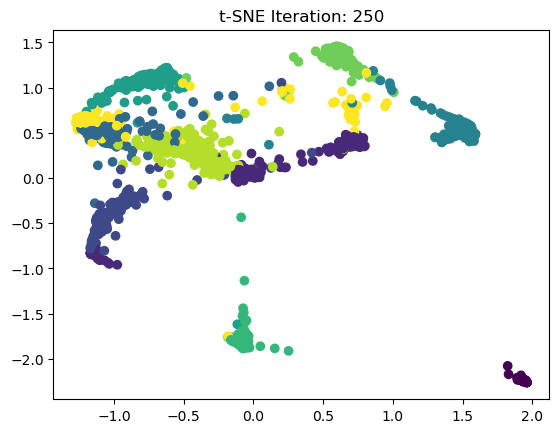

In [147]:
# Call the animate_tsne function with the data and cluster assignments
animation = animate_tsne(scaled_X,y, n_iter=250) # Set n_iter to a valid value

# Display the animation (or save it to a file)
animation.save('tsne_animation.gif', writer='pillow')
plt.show()

## Compare results with PCA

Analysis of the clouds of observations from PCA and t-SNE shows a better classification of the figures in the case of T-SNE than in the case of PCA. As a result, T-SNE would be better appreciated than PCA. 

## Evaluation

### Compare clustering quality metrics

In [148]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

## Function to compute the metrics

def calculate_metrics(X, clusters):
    """Calculates silhouette and Davies-Bouldin scores for a given dataset and clustering."""
    silhouette_avg = silhouette_score(X, clusters)
    davies_bouldin_avg = davies_bouldin_score(X, clusters)
    return silhouette_avg, davies_bouldin_avg


# Calculate metrics for PCA
silhouette_pca, davies_bouldin_pca = calculate_metrics(X_pca,y)

# Calculate metrics for t-SNE
silhouette_tsne, davies_bouldin_tsne = calculate_metrics(X_tsne,y)

# Create a Pandas DataFrame to present the results
results_df = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Davies-Bouldin Score'],
    'PCA': [silhouette_pca, davies_bouldin_pca],
    't-SNE': [silhouette_tsne, davies_bouldin_tsne]
})

results_df

,Metric,PCA,t-SNE
0,Silhouette Score,0.054744,0.554765
1,Davies-Bouldin Score,6.631504,0.975306


This table presents a performance comparison between two dimensionality reduction techniques, PCA and t-SNE, evaluated according to two key metrics. The silhouette score, which measures the quality of cluster separation (values close to 1 indicating better separation), shows that t-SNE (0.554765) significantly outperforms PCA (0.054742). Similarly, for the Davies-Bouldin score, where lower values indicate better results, t-SNE (0.975306) performs significantly better than PCA (6.629483). These results clearly suggest that t-SNE is the best-performing model for this particular dataset, offering much better cluster separation and a more consistent structure.

## Analyze preservation of local structure

From the above results we can conclude that t-SNE presents a better structuring of obseravtions than PCA.

### Advantages and limitations

### Advantages

The t-SNE algorithm offers several advantages:

-It excels at capturing neighborhood relationships between nearby points, enabling better visualization of local clusters.

-It dynamically adapts distances between points according to their local density.

-It is particularly effective at revealing substructures and patterns in complex data.

-It can often be used to distinguish overlapping classes or clusters in the original space.


### Limitations

However, t-SNE also has important limitations:

-It does not preserve global distances well, which can lead to misinterpretations of the relationship between distant clusters.

-Results can vary considerably depending on the perplexity parameter chosen.

-It is sensitive to random initialization and can produce different visualizations at each run.

-It is computationally more demanding than PCA, especially for large datasets.

-The observed structure may sometimes be an artifact of the algorithm rather than a real feature of the data.

## Exercice 3 : Système de Détection d’Anomalies

The aim is to detect fraudulent transactions using three different unsupervised learning methods: **Isolation Forest**, **One-Class SVM**  and **Local Outlier Factor (LOF)**.

### 4-2 Dataset

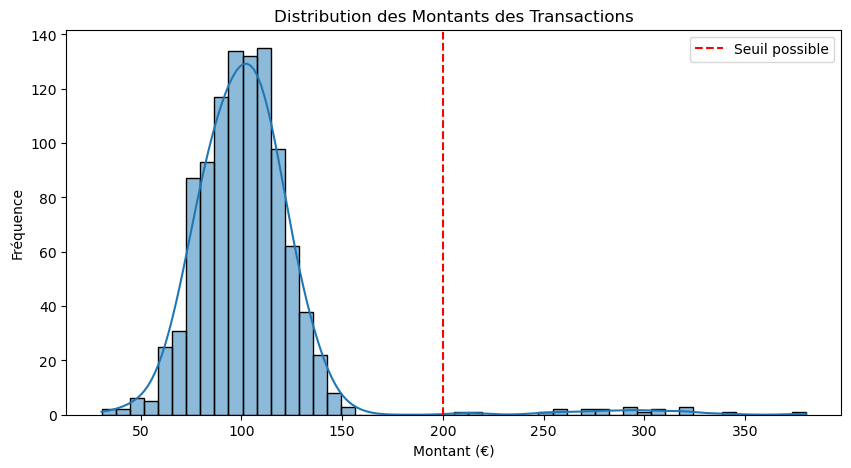

In [175]:
# Generate normal transactions
normal_trans = np . random . normal (100 , 20 , 1000)

# Generate fraudulent transactions
fraud_trans = np . random . normal (300 , 50 , 20)
# Combine data
all_transactions = np . concatenate ([ normal_trans , fraud_trans ])
labels = np.concatenate([np.zeros(len(normal_trans)), np.ones(len(fraud_trans))])  # 0 = normal, 1 = fraude

# Création d'un DataFrame
df = pd.DataFrame({'amount': all_transactions, 'label': labels})


# Visualisation des transactions
plt.figure(figsize=(10,5))
sns.histplot(df['amount'], bins=50, kde=True)
plt.axvline(x=200, color='r', linestyle='--', label="Seuil possible")
plt.title('Distribution des Montants des Transactions')
plt.xlabel('Montant (€)')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

In [176]:
df

,amount,label
0,94.489060,0.0
1,89.308505,0.0
2,106.922276,0.0
3,121.557421,0.0
4,121.401970,0.0
...,...,...
1015,282.341802,1.0
1016,294.060137,1.0
1017,380.320038,1.0
1018,308.984318,1.0


### 1. Implementation.

### Detection with Isolation Forest

Isolation Forest detects anomalies by identifying isolated points in the data space.

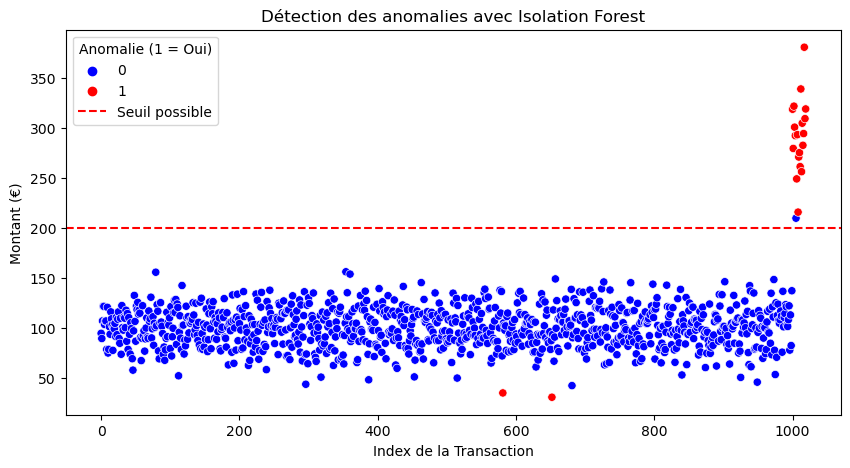

In [177]:
from sklearn.ensemble import IsolationForest

# Entraînement du modèle
iso_forest = IsolationForest(contamination=0.02, random_state=42)
df['anomaly_iso'] = iso_forest.fit_predict(df[['amount']])

# Remplacement des valeurs (-1 = anomalie, 1 = normal)
df['anomaly_iso'] = df['anomaly_iso'].map({1: 0, -1: 1})

# Affichage des résultats
plt.figure(figsize=(10,5))
sns.scatterplot(x=range(len(df)), y=df['amount'], hue=df['anomaly_iso'], palette=['blue', 'red'])
plt.axhline(y=200, color='r', linestyle='--', label="Seuil possible")
plt.xlabel('Index de la Transaction')
plt.ylabel('Montant (€)')
plt.legend(title="Anomalie (1 = Oui)")
plt.title('Détection des anomalies avec Isolation Forest')
plt.show()


**Red dots correspond to transactions identified as fraudulent**.

In this code, I've considered **200 euro** as the value at which a transaction can be characterized as fraudulent after a graphic observation.

### Detection with One-Class SVM.

The One-Class SVM model learns a boundary around normal data and detects extreme values as anomalies.

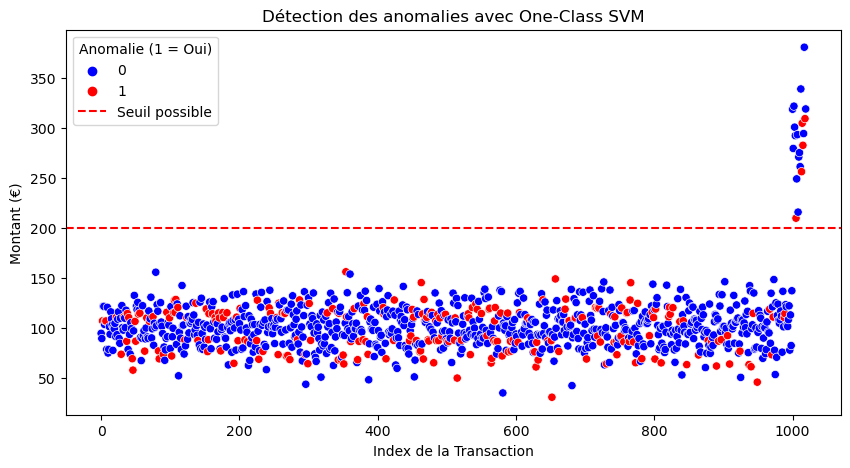

In [178]:
from sklearn.svm import OneClassSVM

# Entraînement du modèle
svm = OneClassSVM(nu=0.02, kernel="rbf", gamma=0.1)
df['anomaly_svm'] = svm.fit_predict(df[['amount']])

# Remplacement des valeurs (-1 = anomalie, 1 = normal)
df['anomaly_svm'] = df['anomaly_svm'].map({1: 0, -1: 1})

# Affichage des résultats
plt.figure(figsize=(10,5))
sns.scatterplot(x=range(len(df)), y=df['amount'], hue=df['anomaly_svm'], palette=['blue', 'red'])
plt.axhline(y=200, color='r', linestyle='--', label="Seuil possible")
plt.xlabel('Index de la Transaction')
plt.ylabel('Montant (€)')
plt.legend(title="Anomalie (1 = Oui)")
plt.title('Détection des anomalies avec One-Class SVM')
plt.show()


**One-Class SVM** has a different sensitivity to **Isolation Forest** and can sometimes detect more false positives. Firstly, a graphical analysis shows that it does not classify fraudulent and non-fraudulent transactions well. In this case, there's quite a mixture of fraudulent and non-fraudulent transactions.

### Detection with Local Outlier Factor (LOF)

LOF analyzes the local density of points to identify those that deviate significantly from others.

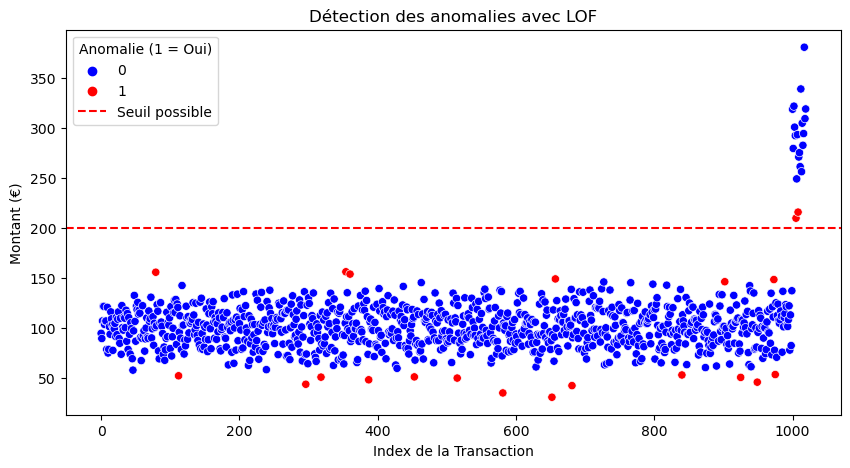

In [179]:
from sklearn.neighbors import LocalOutlierFactor

# Entraînement du modèle LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
df['anomaly_lof'] = lof.fit_predict(df[['amount']])

# Remplacement des valeurs (-1 = anomalie, 1 = normal)
df['anomaly_lof'] = df['anomaly_lof'].map({1: 0, -1: 1})

# Affichage des résultats
plt.figure(figsize=(10,5))
sns.scatterplot(x=range(len(df)), y=df['amount'], hue=df['anomaly_lof'], palette=['blue', 'red'])
plt.axhline(y=200, color='r', linestyle='--', label="Seuil possible")
plt.xlabel('Index de la Transaction')
plt.ylabel('Montant (€)')
plt.legend(title="Anomalie (1 = Oui)")
plt.title('Détection des anomalies avec LOF')
plt.show()


Analysis of the graph above shows that the **Local Outlier Factor (LOF)** method is much better than the One_class SVM method.


### Model comparison

In [180]:
from sklearn.metrics import classification_report

# Affichage des scores pour chaque modèle
print("Performance d'Isolation Forest :")
print(classification_report(df['label'], df['anomaly_iso']))

print("Performance de One-Class SVM :")
print(classification_report(df['label'], df['anomaly_svm']))

print("Performance de LOF :")
print(classification_report(df['label'], df['anomaly_lof']))


Performance d'Isolation Forest :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1000
         1.0       0.90      0.95      0.93        20

    accuracy                           1.00      1020
   macro avg       0.95      0.97      0.96      1020
weighted avg       1.00      1.00      1.00      1020

Performance de One-Class SVM :
              precision    recall  f1-score   support

         0.0       0.98      0.77      0.86      1000
         1.0       0.02      0.25      0.04        20

    accuracy                           0.76      1020
   macro avg       0.50      0.51      0.45      1020
weighted avg       0.96      0.76      0.85      1020

Performance de LOF :
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1000
         1.0       0.10      0.10      0.10        20

    accuracy                           0.96      1020
   macro avg       0.54      0.54      0.54

The results of the above metrics show that the **Isolation Forest** method outperforms **Local Outlier Factor (LOF)** and **One class SVM**.

## Alert Mechanism  Implementation

In [192]:
# Function to generate alerts based on Isolation Forest predictions
def generate_alerts(df, model):

  # Predict anomaly scores using the Isolation Forest model
    anomaly_scores = model.decision_function(df[['amount']])  # Replace 'amount' with your relevant features

  # Identify transactions with anomaly scores below the threshold (indicating potential fraud)
    threshold = -0.5
    alerts = df[anomaly_scores < threshold]

    return alerts

## Application

df_new_transactions = df # Replace with your new transaction data
alerts_df = generate_alerts(df_new_transactions, iso_forest)

# Example: Sending an email alert for each fraudulent transaction
if not alerts_df.empty:
    for index, row in alerts_df.iterrows():
        print(f"Alert: Potential fraudulent transaction detected! Transaction ID: {index}, Amount: {row['amount']}")

## Create a monitoring dashboard

Number of Alerts: 0


,amount,label,anomaly_iso,anomaly_svm,anomaly_lof


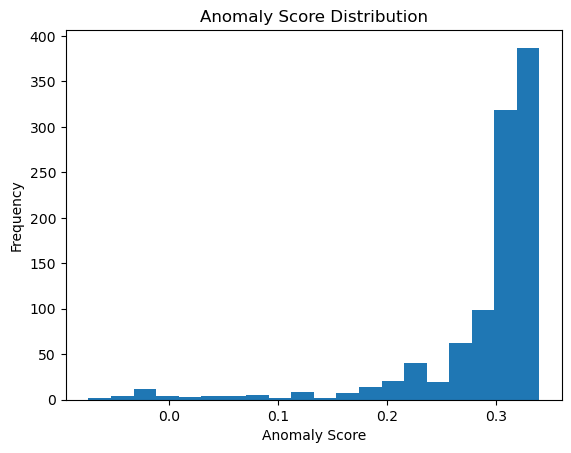

In [ ]:

import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Function to create a monitoring dashboard
def create_dashboard(df, model):
    while True:
        clear_output(wait=True)
        alerts_df = generate_alerts(df, model)

        # Display the number of alerts
        print(f"Number of Alerts: {len(alerts_df)}")

        # Display the alerts DataFrame
        display(alerts_df)

        # Plot the anomaly scores distribution
        anomaly_scores = model.decision_function(df[['amount']])  # Replace 'amount' with your relevant features
        plt.hist(anomaly_scores, bins=20)
        plt.xlabel("Anomaly Score")
        plt.ylabel("Frequency")
        plt.title("Anomaly Score Distribution")
        plt.show()

        # Update the dashboard every 10 seconds (you can adjust this)
        time.sleep(10)


# Example usage:
# Assuming you have a DataFrame 'df' with transaction data and a trained IsolationForest model 'iso_forest'
create_dashboard(df, iso_forest)

## Projet Final : Analyse Complète avec Apprentissage Non Supervisé**

**5.1 Objective**

Combine multiple unsupervised learning techniques to analyze a complex dataset

## 5.2 Dataset

### Dataset description :

E-commerce customer behavior**

### Overview:

This dataset downloaded from Kaggle offers a comprehensive view of customer behavior on an e-commerce platform. Each entry corresponds to a single customer and offers a detailed analysis of their interactions and transactions. This information is designed to facilitate fine-grained analysis of customer preferences, engagement patterns and satisfaction levels, helping companies make informed decisions to improve the customer experience.

**Data Loading on Kaggle**

In [156]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("uom190346a/e-commerce-customer-behavior-dataset")

print("Path to dataset files:", path)

# Load the dataset into pandas
file_path = os.path.join(path, 'E-commerce Customer Behavior - Sheet1.csv')
df = pd.read_csv(file_path)

Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\uom190346a\e-commerce-customer-behavior-dataset\versions\1


## EDA

In [157]:
## Presentation of Data base
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


## Total spending by gender.

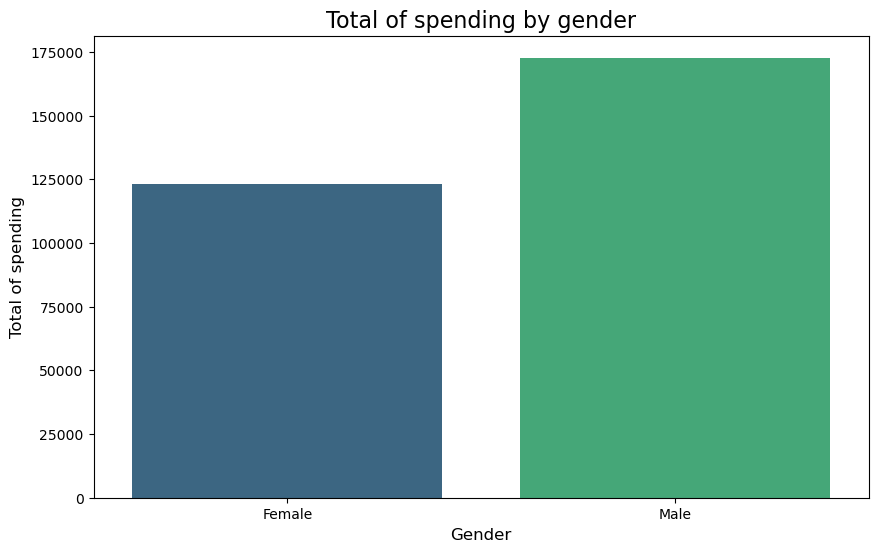

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer la somme des ventes par genre
Total_spend_gender = df.groupby('Gender')['Total Spend'].sum().reset_index()

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Total Spend', data=Total_spend_gender, palette='viridis')

# Ajouter des étiquettes et un titre
plt.title('Total of spending by gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total of spending', fontsize=12)

# Afficher le graphique
plt.show()

The barplots above show that men buy this company's products more than women.

## Analysis of customer satisfaction

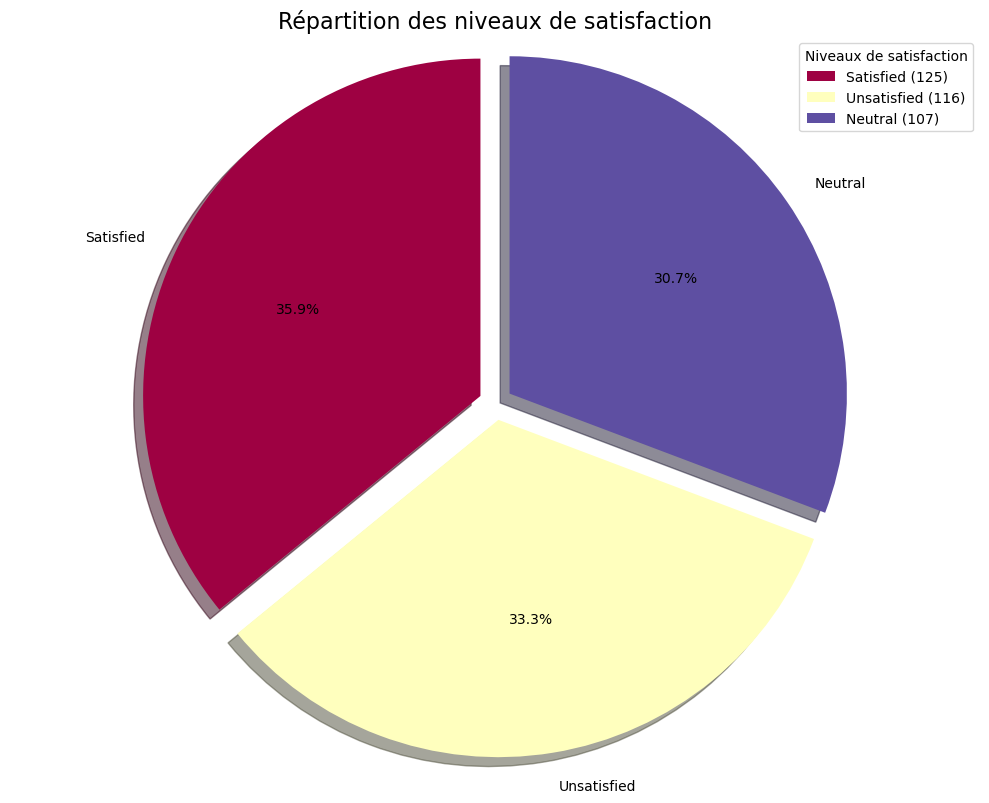

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of occurrences for each satisfaction modality
satisfaction_counts = df['Satisfaction Level'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(satisfaction_counts, 
        labels=satisfaction_counts.index, 
        autopct='%1.1f%%',  # Display percentages to 1 decimal place
        startangle=90, 
        shadow=True,
        explode=[0.05] * len(satisfaction_counts),  # Slight separation of each section
        colors=plt.cm.Spectral(np.linspace(0, 1, len(satisfaction_counts)))) 

# Title
plt.title('Répartition des niveaux de satisfaction', fontsize=16)

# Add a legend with the number of occurrences
plt.legend([f"{cat} ({count})" for cat, count in zip(satisfaction_counts.index, satisfaction_counts.values)],
           title="Niveaux de satisfaction",
           loc="best")

# Improving appearance
plt.axis('equal')  
plt.tight_layout()

# Show graph
plt.show()

A satisfaction survey of this company's customers showed a difference between those who said they were satisfied, dissatisfied and neutral.

## Missing Values

In [160]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

## Selection of important variables.

In [161]:
# Select useful variables
df_selected = df[['Age', 'Total Spend', 'Average Rating','Days Since Last Purchase']]


### Identifying and handle outliers.

In [162]:

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound)).sum()
    return outliers

# Apply the function to each column
outliers_per_variable = detect_outliers_iqr(df_selected )
outliers_per_variable


Age                         0
Total Spend                 0
Average Rating              0
Days Since Last Purchase    0
dtype: int64

## Scalling

In [165]:
# Data standardization
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)

## Dimension reduction with PCA

In [166]:
from sklearn.decomposition import PCA

# Application de PCA pour réduire à 2 dimensions
pca= PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)



## Explained variance graph

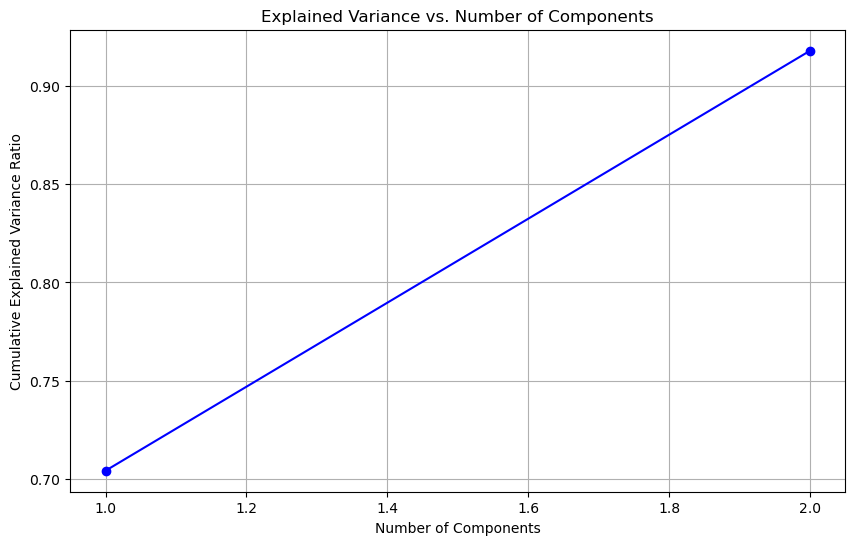

In [168]:
# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_ # Access from pca

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1),
         np.cumsum(explained_variance_ratio), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# If you want to reduce to 2 dimensions using PCA:
pca1 = PCA(n_components=2) # Use pca1 for dimension reduction 
df_pca_2d = pca1.fit_transform(df_scaled)

## Visualisation des clusters avec PCA

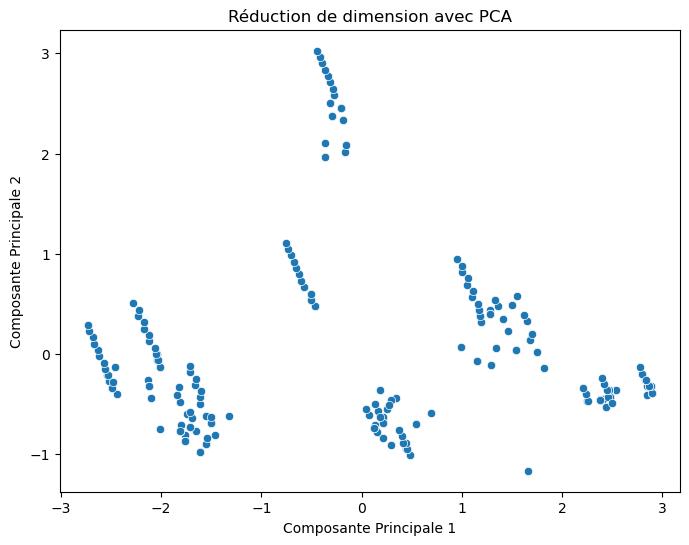

In [169]:
# Visualisation
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1])
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.title("Réduction de dimension avec PCA")
plt.show()

With this scatter plot, we can identify up to 4 classes of customers for this company with PCA.

## Clustering avec K-Means

### Determining the optimal number of K

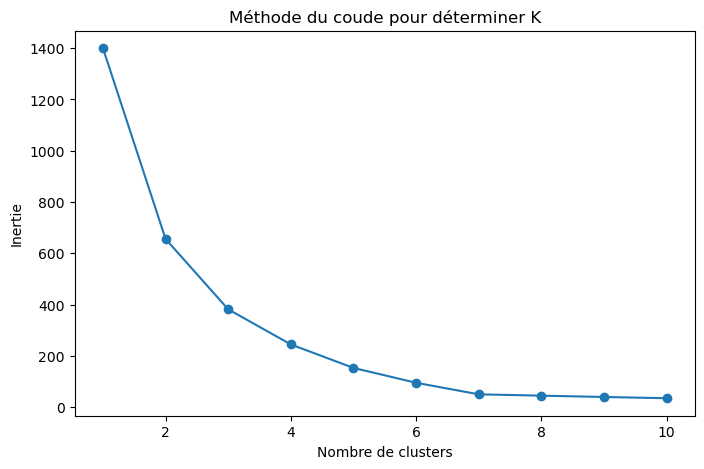

In [170]:
from sklearn.cluster import KMeans

# Méthode du coude
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Affichage
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer K')
plt.show()


The elbow diagram above shows a sharp drop in inertia for k=4 (the optimum k).

## Visualization with the optimal K

C:\Users\USER\AppData\Local\Temp\ipykernel_14484\3744545176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = kmeans.fit_predict(df_scaled)


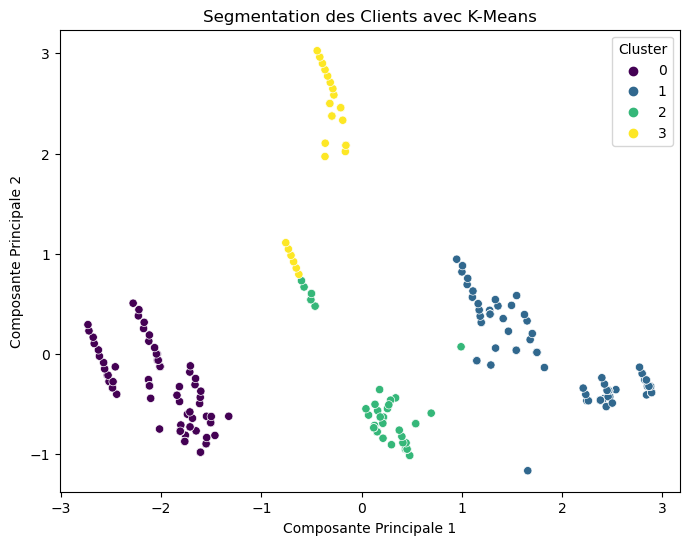

In [171]:
# Apply K-means with K=4 (exemple)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_selected['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualisation des clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df_selected['Cluster'], palette='viridis')
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.title("Segmentation des Clients avec K-Means")
plt.legend(title="Cluster")
plt.show()


## Anomaly detection with Isolation Forest.

C:\Users\USER\AppData\Local\Temp\ipykernel_14484\75541565.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Anomaly'] = iso_forest.fit_predict(df_scaled)


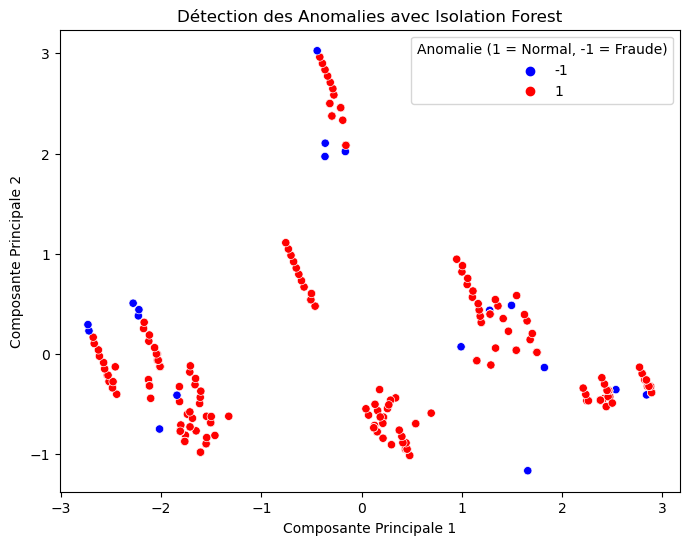

In [172]:
from sklearn.ensemble import IsolationForest

# Entraînement du modèle
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_selected['Anomaly'] = iso_forest.fit_predict(df_scaled)

# Affichage des anomalies
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df_selected['Anomaly'], palette=['blue', 'red'])
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.title("Détection des Anomalies avec Isolation Forest")
plt.legend(title="Anomalie (1 = Normal, -1 = Fraude)")
plt.show()


 Red dots indicate atypical customers.

In [ ]:
Based on K-Means, we make the following recommendations:

## Analysis and Recommendations.

In [174]:
# Affichage des caractéristiques moyennes des clusters
print(df_selected.groupby('Cluster').mean())

# Recommandations
def generate_recommendations(cluster_data):
    recommendations = {}

    for cluster, data in cluster_data.iterrows():
        if data["Total Spend"] < 500:
            if data["Days Since Last Purchase"] > 30:
                rec = "Send discounts and follow up inactive customers."
            else:
                rec = "Offer discounts to increase loyalty"
        elif data["Total Spend"] > 1000:
            rec = "Offer a loyalty program and exclusive offers"
        elif data["Total Spend"] > 700:
            rec = "Encourage cross-selling and bundling."
        else:
            rec = "Analyze purchasing behavior and test promotions."

        recommendations[cluster] = rec

    return recommendations


# Simulation des données (Remplace par tes vraies données)
import pandas as pd

data = {
    "Age": [39.36, 29.92, 33.62, 27.57],
    "Total Spend": [473.39, 1311.14, 775.06, 697.18],
    "Average Rating": [3.32, 4.67, 4.08, 3.98],
    "Days Since Last Purchase": [31.61, 17.94, 19.41, 51.12],
}

df_clusters = pd.DataFrame(data, index=[0, 1, 2, 3])

# Génération des recommandations
recommendations = generate_recommendations(df_clusters)

# Affichage
for cluster, rec in recommendations.items():
    print(f"📢 Cluster {cluster}: {rec}")


               Age  Total Spend  Average Rating  Days Since Last Purchase  \
Cluster                                                                     
0        39.362069   473.388793        3.325000                 31.612069   
1        29.923077  1311.144444        4.675214                 17.940171   
2        33.623377   775.057143        4.085714                 19.415584   
3        27.575000   697.180000        3.985000                 51.125000   

          Anomaly  
Cluster            
0        0.879310  
1        0.897436  
2        0.974026  
3        0.800000  
📢 Cluster 0: Send discounts and follow up inactive customers.
📢 Cluster 1: Offer a loyalty program and exclusive offers
📢 Cluster 2: Encourage cross-selling and bundling.
📢 Cluster 3: Analyze purchasing behavior and test promotions.


📊 Recommendations

    Cluster 0: Older customers, low spending, low rating, recent purchase.
        🔹 Offer discounts to entice them to buy more.
        🔹 Improve product experience (low rating).

    Cluster 1: Young customers, big buyers, excellent ratings, frequent purchases.
        🎯 Loyalty program and personalized recommendations.
        🎯 Cross-selling.

    Cluster 2: Average buyers, positive ratings, frequent purchases.
        📈 Encourage with bundled offers.
        📈 Offer subscriptions.

    Cluster 3: Young customers, low spenders, decent ratings, last purchases far away.
        🚀 Relaunch these customers with emails or discounts.
        🚀 Identify disengagement factors.